# Bins vs. Energies

We are now using a new program that takes data over a single-step window, rather than relying on subtraction to determine what these values "should" be.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as interp

In [2]:
#Import data
#dataPuBe = pd.read_csv ("data/PuBe_det1.csv")
dataNa22 = pd.read_csv ("data/Na22_det1.csv")
#thrsPuBe = (dataPuBe.iloc[:,0] + dataPuBe.iloc[:,1])/2
thrsNa22 = (dataNa22.iloc[:,0] + dataNa22.iloc[:,1])/2
#ratePuBe = dataPuBe.iloc[:,2]
rateNa22 = dataNa22.iloc[:,2]

#Cut an ill-behaved region
#ratePuBe = ratePuBe[thrsPuBe > 220]
#rateNa22 = rateNa22[thrsNa22 > 220]
#thrsPuBe = thrsPuBe[thrsPuBe > 220]
#thrsNa22 = thrsNa22[thrsNa22 > 220]

#del dataPuBe, dataNa22

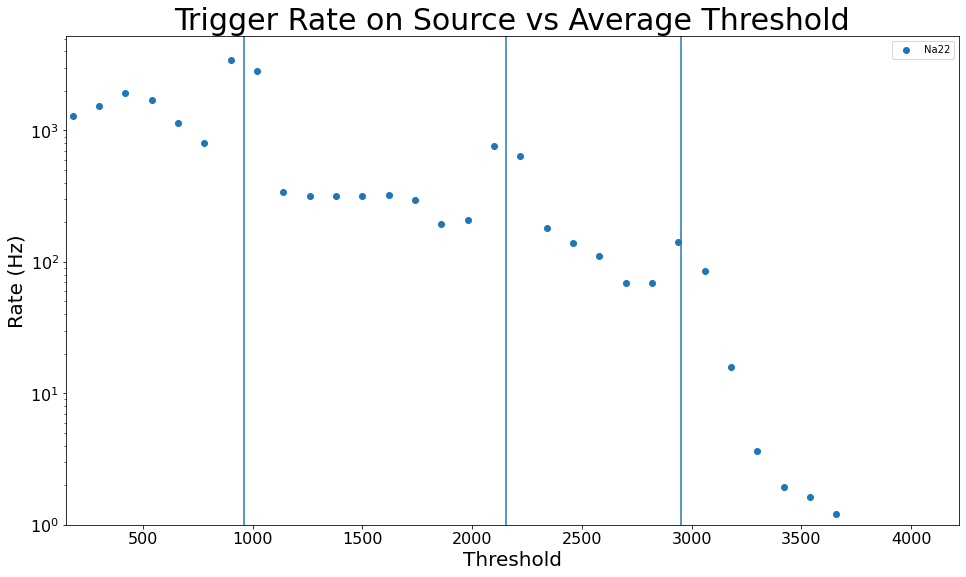

In [13]:
plt.figure(figsize=(16,9))

plt.scatter(thrsNa22,rateNa22,label="Na22")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Source vs Average Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.yscale('log')
plt.xlim(150)
plt.ylim(1)

plt.axvline(960)
plt.axvline(2155)
plt.axvline(2950)

plt.legend()
plt.show()

## Fitting the Bin/Energy Relationship

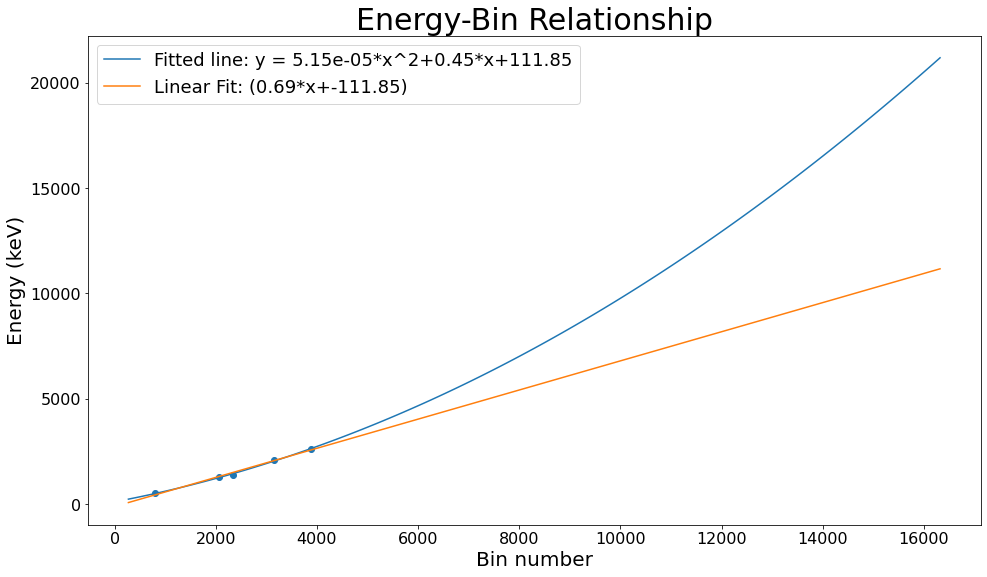

In [9]:
#Set up our model
def f_quad(x,a,b,c):
    return a*x**2+b*x+c
l_model = lf.Model(f_quad)
params = l_model.make_params(a=0,b=1,c=0) #Use our old 'fit' for inital guesses.


binpoints = [800,2068,2340,f(2100),f(2615)]
energypoints = [511,1274,1400,2100,2615]

#Do the fit
l_fit = l_model.fit(energypoints,params,x=binpoints)
l_dict = l_fit.best_values
l_a = l_dict['a']
l_b = l_dict['b']
l_c = l_dict['c']
l_curve = f_quad(thrsNa22,l_a,l_b,l_c)

def f_linear(x,m,b):
    return m*x+b
lin_mod = lf.Model(f_linear)
lin_params = lin_mod.make_params(m=0,b=0)

#Do the fit
lin_fit = lin_mod.fit(energypoints,lin_params,x=binpoints)
lin_dict = lin_fit.best_values
lin_m = lin_dict['m']
lin_b = lin_dict['b']

#plot it
plt.figure(figsize=(16,9))
plt.scatter(binpoints,energypoints)
plt.plot(thrsNa22,l_curve,label="Fitted line: y = {:.2e}*x^2+{:.2f}*x+{:.2f}".format(l_a,l_b,l_c))
plt.plot(thrsNa22,lin_m*thrsNa22+lin_b,label="Linear Fit: ({:.2f}*x+{:.2f})".format(lin_m,lin_b))
plt.title("Energy-Bin Relationship",fontsize=30)
plt.xlabel("Bin number",fontsize=20)
plt.ylabel("Energy (keV)",fontsize=20)
plt.legend(fontsize=18)
plt.show()

l_fit

In [10]:
lin_fit